In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac, parafac2, tucker
from scipy.interpolate import interp1d
import tlviz

In [21]:
matrices = []
for i in range(16):
    sheet_index = 2*i
    file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
    tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')

    # Remove rows where 'CDR3.amino.acid.sequence' is NaN
    tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])

    # Select columns containing '_S'
    tcr_counts = tcr_df.filter(regex='_S').copy()

    # Rename columns by extracting the part after '_'
    tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
    tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
    tcr_counts = tcr_counts.where(~(tcr_counts.isna()), 0)
    matrix = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
    print(matrix.shape)
    matrices.append(matrix)

(100, 16)
(100, 11)
(100, 11)
(100, 34)
(100, 4)
(100, 8)
(100, 20)
(100, 6)
(100, 7)
(100, 6)
(100, 5)
(100, 5)
(100, 4)
(100, 6)
(100, 4)
(100, 11)


In [22]:
#Transposing the data
matrices_t = [df.T.astype(float).to_numpy() for df in matrices]

In [23]:
#Running Parafac2
rank = 3
weights, factors, projections = parafac2(matrices_t, rank=rank)

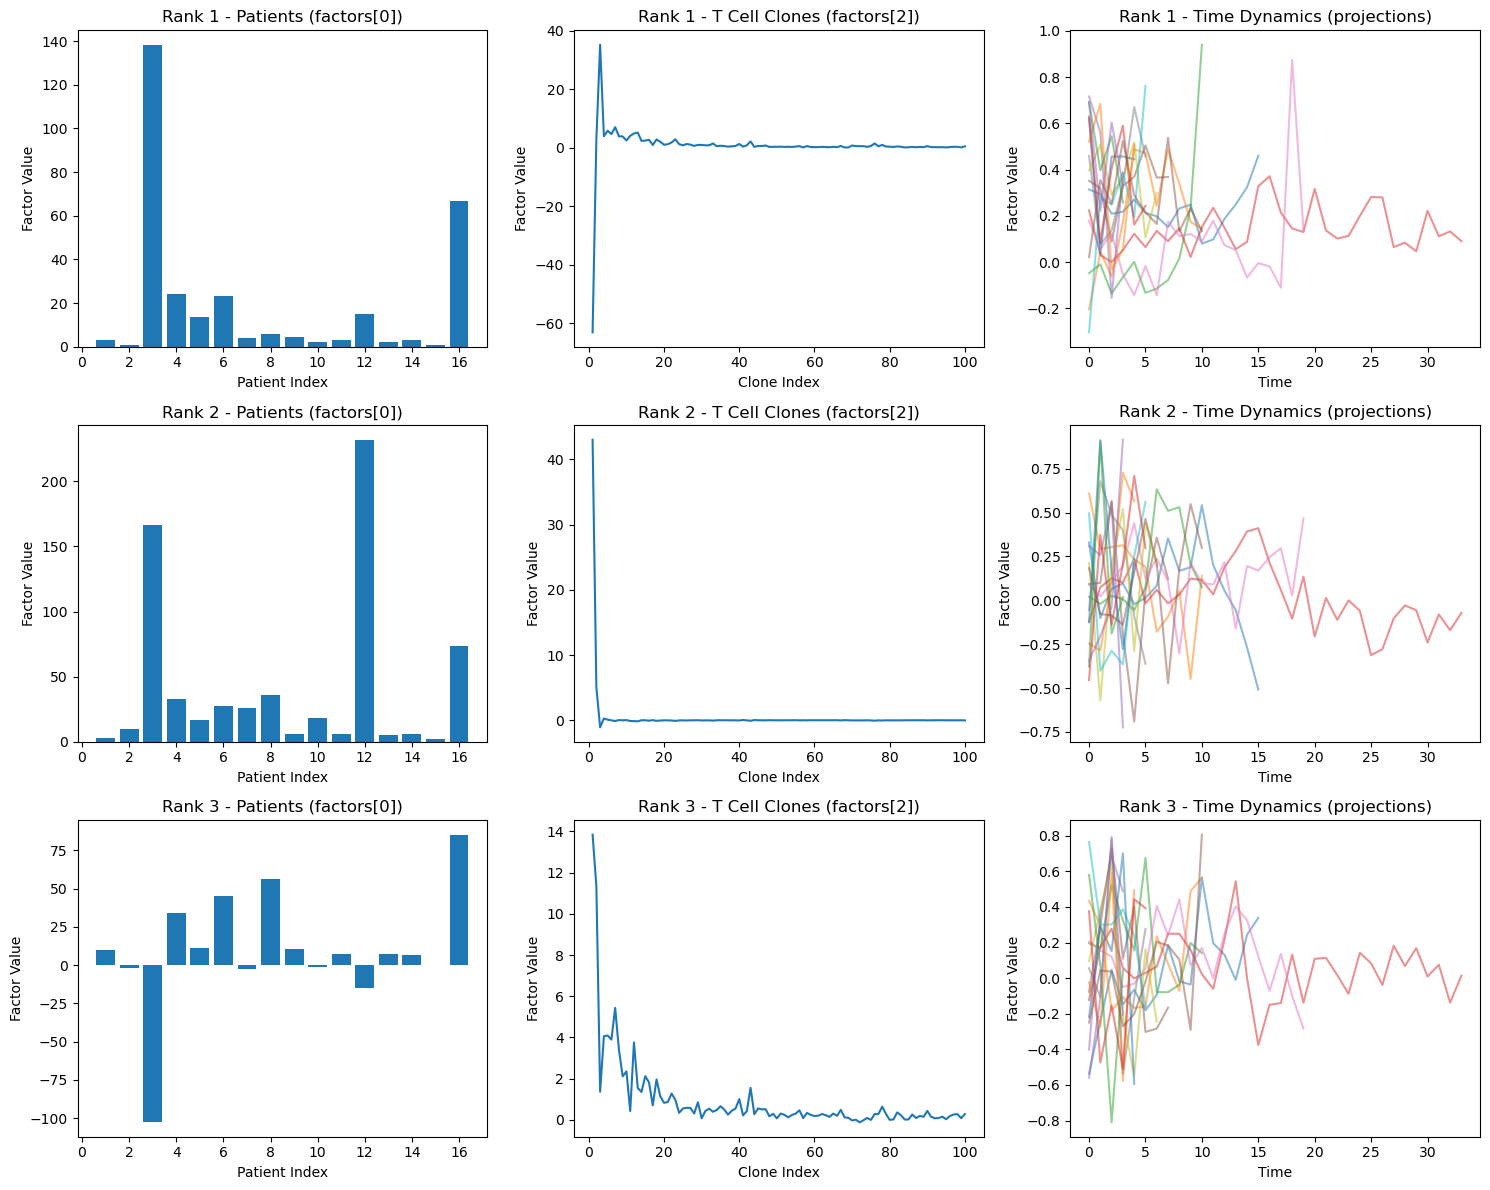

In [39]:
#Visualizations

fig, axes = plt.subplots(rank, 3, figsize=(15, 12))

# 📌 Row 1: Factor 1 (factors[0], factors[2], projections) for Rank 1
for dim, (title, data) in enumerate([
    ("Patients (factors[0])", factors[0]), 
    ("T Cell Clones (factors[2])", factors[2]), 
    ("Time Dynamics (projections)", projections)
]):
    if dim == 0:  # Patients (factors[0])
        axes[0, dim].bar(range(1, 17), data[:, 0])  # Bar plot for 16 patients (rank 1)
        axes[0, dim].set_title(f"Rank 1 - {title}")
        axes[0, dim].set_xlabel("Patient Index")
        axes[0, dim].set_ylabel("Factor Value")
    elif dim == 1:  # T Cell Clones (factors[2])
        axes[0, dim].plot(range(1, 101), data[:, 0])  # Line plot for 100 clones (rank 1)
        axes[0, dim].set_title(f"Rank 1 - {title}")
        axes[0, dim].set_xlabel("Clone Index")
        axes[0, dim].set_ylabel("Factor Value")
    else:  # Time Dynamics (projections)
        for i, projection in enumerate(data):  # Loop over 16 patients
            axes[0, dim].plot(range(len(projection)), projection[:, 0], alpha=0.5)  # Plot each patient
        axes[0, dim].set_title(f"Rank 1 - {title}")
        axes[0, dim].set_xlabel("Time")
        axes[0, dim].set_ylabel("Factor Value")

# 📌 Row 2: Factor 2 (factors[0], factors[2], projections) for Rank 2
for dim, (title, data) in enumerate([
    ("Patients (factors[0])", factors[0]), 
    ("T Cell Clones (factors[2])", factors[2]), 
    ("Time Dynamics (projections)", projections)
]):
    if dim == 0:  # Patients (factors[0])
        axes[1, dim].bar(range(1, 17), data[:, 1])  # Bar plot for 16 patients (rank 2)
        axes[1, dim].set_title(f"Rank 2 - {title}")
        axes[1, dim].set_xlabel("Patient Index")
        axes[1, dim].set_ylabel("Factor Value")
    elif dim == 1:  # T Cell Clones (factors[2])
        axes[1, dim].plot(range(1, 101), data[:, 1])  # Line plot for 100 clones (rank 2)
        axes[1, dim].set_title(f"Rank 2 - {title}")
        axes[1, dim].set_xlabel("Clone Index")
        axes[1, dim].set_ylabel("Factor Value")
    else:  # Time Dynamics (projections)
        for i, projection in enumerate(data):  # Loop over 16 patients
            axes[1, dim].plot(range(len(projection)), projection[:, 1], alpha=0.5)  # Plot each patient
        axes[1, dim].set_title(f"Rank 2 - {title}")
        axes[1, dim].set_xlabel("Time")
        axes[1, dim].set_ylabel("Factor Value")

# 📌 Row 3: Factor 3 (factors[0], factors[2], projections) for Rank 3
for dim, (title, data) in enumerate([
    ("Patients (factors[0])", factors[0]), 
    ("T Cell Clones (factors[2])", factors[2]), 
    ("Time Dynamics (projections)", projections)
]):
    if dim == 0:  # Patients (factors[0])
        axes[2, dim].bar(range(1, 17), data[:, 2])  # Bar plot for 16 patients (rank 3)
        axes[2, dim].set_title(f"Rank 3 - {title}")
        axes[2, dim].set_xlabel("Patient Index")
        axes[2, dim].set_ylabel("Factor Value")
    elif dim == 1:  # T Cell Clones (factors[2])
        axes[2, dim].plot(range(1, 101), data[:, 2])  # Line plot for 100 clones (rank 3)
        axes[2, dim].set_title(f"Rank 3 - {title}")
        axes[2, dim].set_xlabel("Clone Index")
        axes[2, dim].set_ylabel("Factor Value")
    else:  # Time Dynamics (projections)
        for i, projection in enumerate(data):  # Loop over 16 patients
            axes[2, dim].plot(range(len(projection)), projection[:, 2], alpha=0.5)  # Plot each patient
        axes[2, dim].set_title(f"Rank 3 - {title}")
        axes[2, dim].set_xlabel("Time")
        axes[2, dim].set_ylabel("Factor Value")

# Improve spacing
plt.tight_layout()
plt.show()